In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

In [2]:

iris_df = pd.read_csv('IRIS.csv')
iris_df.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [3]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris_df.shape

(150, 6)

In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

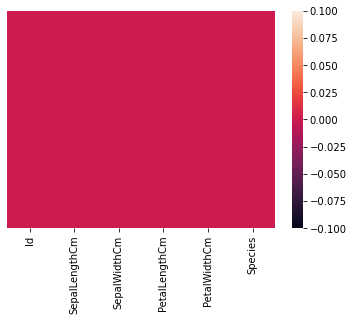

In [20]:
sns.heatmap(iris_df.isnull() , yticklabels = False) #generating heatmap for missing values

plt.show()

In [8]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [24]:
y = np.array(iris_df['Species']) 
X = np.array(iris_df.drop('Species' , axis = 1))

ValueError: num must be 1 <= num <= 4, not 5

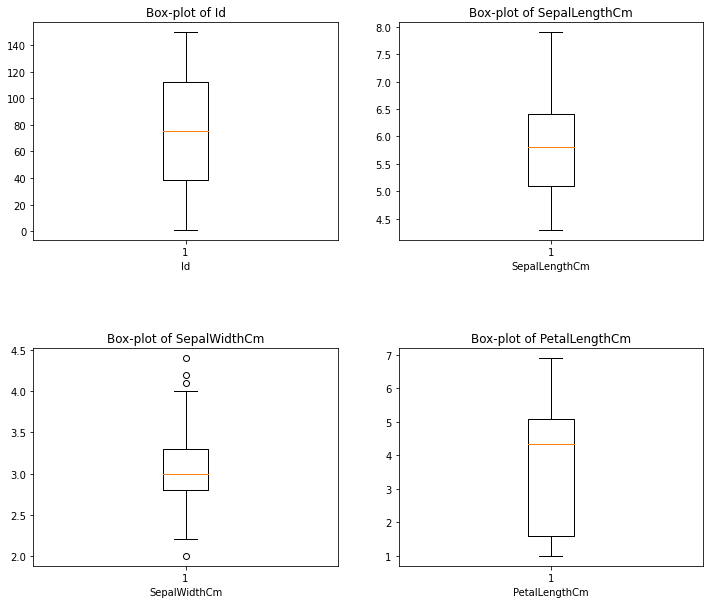

In [29]:
i=1
plt.figure(figsize = (12, 10)) 
plt.subplots_adjust(hspace = 0.5) 
for column in iris_df.drop('Species' , axis = 1).columns:
    plt.subplot(2 , 2 , i)
    plt.boxplot(iris_df[str(column)])
    plt.xlabel(str(column))
    plt.title('Box-plot of '+str(column))
    i = i + 1   

In [30]:
X_train , X_1 , y_train ,y_1 = train_test_split(X , y , test_size = 0.8 , random_state = 0) 

X_cv , X_test , y_cv , y_test = train_test_split(X_1 , y_1 , test_size = 0.5 , random_state = 0)

In [34]:
params = {'multi_class': ['multinomial'],
          'solver' : ['newton-cg', 'lbfgs'],
          'penalty' : ['l2'],
          'C':[0.1 , 0.3 , 1 , 3]
         }
grid = GridSearchCV(LogisticRegression(),
                   params,
                   cv = 5,
                   n_jobs = -1)
grid.fit(X_train , y_train) 

grid.best_estimator_ 

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')

In [36]:

lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

lr.fit(X_train , y_train)
y_pred = lr.predict(X_train)

print('The f1 score is', f1_score(y_train , y_pred , average = 'weighted'))

The f1 score is 1.0


In [37]:
conf_matrix = confusion_matrix(y_train , y_pred , labels = ['Iris-versicolor' , 'Iris-virginica' , 'Iris-setosa'])
conf_matrix

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

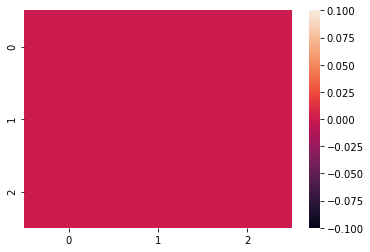

In [38]:
row_sum = np.sum(conf_matrix , axis = 1 , keepdims = True) 
np.fill_diagonal(conf_matrix , 0) 
conf_matrix = conf_matrix / row_sum
sns.heatmap(conf_matrix)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


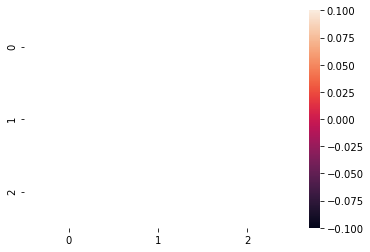

In [39]:
row_sum = np.sum(conf_matrix , axis = 1 , keepdims = True) 
np.fill_diagonal(conf_matrix , 0)
conf_matrix = conf_matrix / row_sum
sns.heatmap(conf_matrix) 
plt.show()

In [40]:
y_cv_pred = lr.predict(X_cv) 
print('F1 score of CV set is' , f1_score(y_cv , y_cv_pred , average = 'weighted'))
print('F1 score of Train set is' , f1_score(y_train , y_pred , average = 'weighted'))

F1 score of CV set is 0.9501687858070835
F1 score of Train set is 1.0


In [41]:
y_test_pred = lr.predict(X_test)

print('F1 score of test set is' , f1_score(y_test , y_test_pred , average = 'weighted'))

F1 score of test set is 0.9496385770293149


In [42]:
joblib.dump(lr, 'iris_model.pkl')

['iris_model.pkl']